In [1]:
from functions import WideAndDeepModel
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-12-24 11:24:02.310076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-24 11:24:02.328950: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-24 11:24:02.334089: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-24 11:24:02.346722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = np.linspace(0,5,1000).reshape((-1,1))
y = x**2 + + x - 9 + np.random.normal(0,.5)


In [3]:
model = WideAndDeepModel()

model.compile(loss='mse',optimizer='sgd')

2024-12-24 11:24:06.272004: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-12-24 11:24:06.272053: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: mickael-Aspire-A515-54G
2024-12-24 11:24:06.272063: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: mickael-Aspire-A515-54G
2024-12-24 11:24:06.272221: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.120.0
2024-12-24 11:24:06.272252: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.120.0
2024-12-24 11:24:06.272275: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.120.0


In [4]:
model.fit(x,y,epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling WideAndDeepModel.call().

[1mA `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(1,), (None, 30)][0m

Arguments received by WideAndDeepModel.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


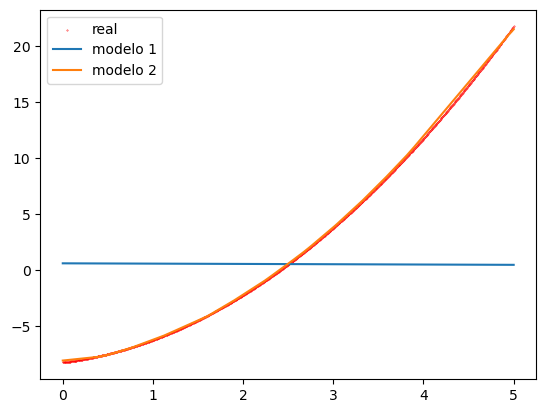

In [ ]:
plt.scatter(x,y,label='real',s=.1,c='red')
plt.plot(x,model.predict(x),label='modelo 2')
plt.legend()

In [1]:
import tensorflow as tf

tensor = tf.constant(0.,dtype=float,shape=(2,2))
tensor + tf.constant([[1,0],[0,1]],dtype=float)

2025-01-06 19:42:20.167944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-06 19:42:20.199486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-06 19:42:20.211313: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 19:42:20.397266: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1736203343.652466    50

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [ ]:
tensor = tf.constant([1,2,3,5,6],dtype='float64')[:,tf.newaxis]
a = tf.where(tensor == 5)
i,j = a.numpy()[0,:]
tensor
y = tensor**2
y

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 1.],
       [ 4.],
       [ 9.],
       [25.],
       [36.]], dtype=float32)>

In [ ]:
import numpy as np

tensor = tf.constant([1,2,3,4,5],dtype=tf.float64)[:,tf.newaxis]
tf.where(tensor == 1,tf.constant(0.,dtype=tf.float64),tensor)

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[0.],
       [2.],
       [3.],
       [4.],
       [5.]])>